# Image Classification with Neural Networks

In [26]:
#first, I'm importing everything I need
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import tqdm
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [22]:
#specifiying how to transform the images - 3 channels for RBG 
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#getting my data
dataset = datasets.ImageFolder(root = r'C:\Users\linds\OneDrive\Documents\MSBA-lindsayslaptop\STA S380\EuroSAT_RGB', transform = transform)

In [30]:
#Now I want to split the data into training and testing data
train_size = int(0.8* len(dataset))
test_size = len(dataset) - train_size

train, test = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test, batch_size=64, shuffle=False, num_workers=2)

#I want the names of the the types of photos
class_names = dataset.classes

In [32]:
#I want to check and make sure everything is loaded correctly
for images, labels in train_loader:
    print(images.shape)   
    print(labels.shape)  
    break

torch.Size([64, 3, 64, 64])
torch.Size([64])


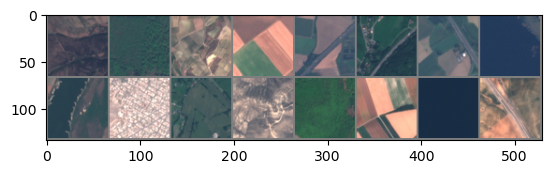

Labels: HerbaceousVegetation Forest PermanentCrop AnnualCrop Highway Highway Highway SeaLake River Residential Pasture HerbaceousVegetation Forest AnnualCrop SeaLake Highway


In [38]:
#Now we want to display some images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training images and display them
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:16]))
print('Labels:', ' '.join(class_names[labels[j]] for j in range(16)))

In [46]:
#defining the CNN

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)  # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(57600, 128)
        self.fc2 = nn.Linear(128, 11)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=57600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=11, bias=True)
)


In [49]:
# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4)

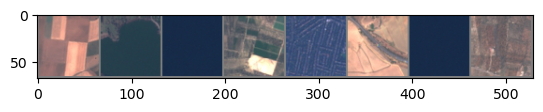

Predicted: AnnualCrop SeaLake SeaLake PermanentCrop Residential Highway SeaLake PermanentCrop


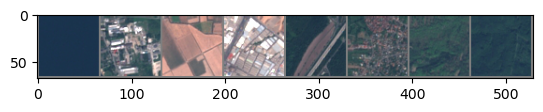

Predicted: SeaLake Industrial AnnualCrop Industrial Highway Residential Pasture Forest


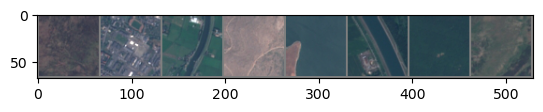

Predicted: HerbaceousVegetation Residential River HerbaceousVegetation SeaLake Highway Forest HerbaceousVegetation


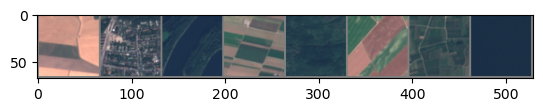

Predicted: AnnualCrop Residential Forest AnnualCrop Forest AnnualCrop Pasture SeaLake


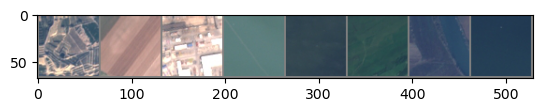

Predicted: Industrial AnnualCrop Industrial SeaLake Forest Forest Forest SeaLake


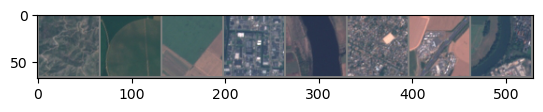

Predicted: HerbaceousVegetation Pasture AnnualCrop Industrial River Residential Highway River


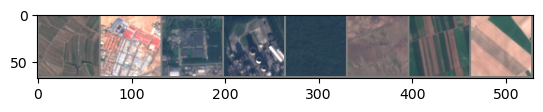

Predicted: HerbaceousVegetation Highway Highway Industrial Forest HerbaceousVegetation PermanentCrop AnnualCrop


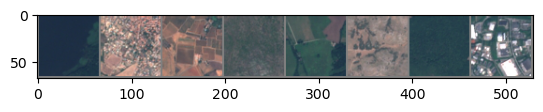

Predicted: SeaLake Residential PermanentCrop HerbaceousVegetation Pasture HerbaceousVegetation Forest Industrial


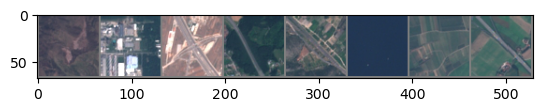

Predicted: HerbaceousVegetation Industrial Highway Highway Highway SeaLake PermanentCrop Highway


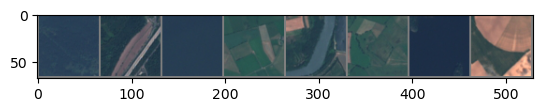

Predicted: SeaLake Highway SeaLake Pasture River Pasture SeaLake AnnualCrop


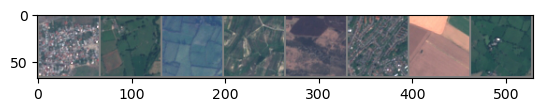

Predicted: Industrial Pasture Pasture PermanentCrop HerbaceousVegetation Residential AnnualCrop Pasture


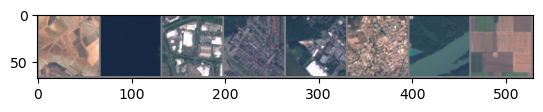

Predicted: PermanentCrop SeaLake Industrial Residential Industrial Residential River AnnualCrop


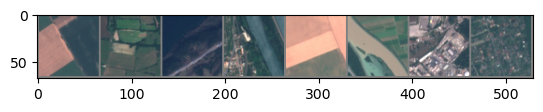

Predicted: AnnualCrop Highway Highway Highway AnnualCrop AnnualCrop Industrial Residential


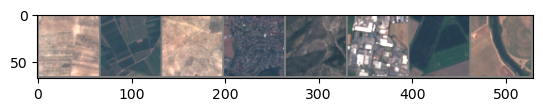

Predicted: PermanentCrop River PermanentCrop Residential HerbaceousVegetation Industrial River PermanentCrop


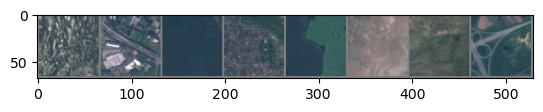

Predicted: Residential Industrial Forest Residential River HerbaceousVegetation HerbaceousVegetation River


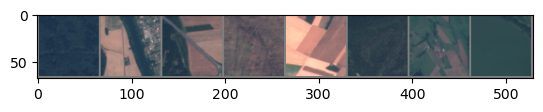

Predicted: Forest Highway Highway HerbaceousVegetation AnnualCrop Forest River Forest


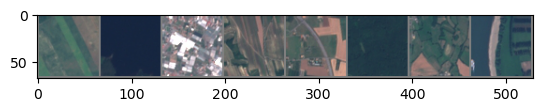

Predicted: AnnualCrop SeaLake Industrial PermanentCrop PermanentCrop Forest AnnualCrop River
Epoch 1, Loss: 0.4033839325668544


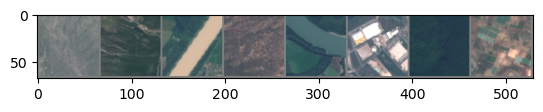

Predicted: HerbaceousVegetation HerbaceousVegetation AnnualCrop HerbaceousVegetation River Industrial Forest PermanentCrop


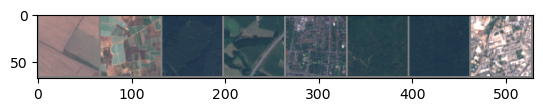

Predicted: AnnualCrop PermanentCrop Forest River Residential Forest Forest Industrial


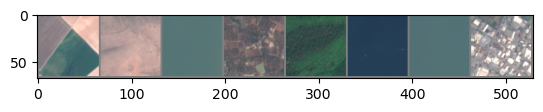

Predicted: AnnualCrop AnnualCrop SeaLake HerbaceousVegetation Forest SeaLake SeaLake Industrial


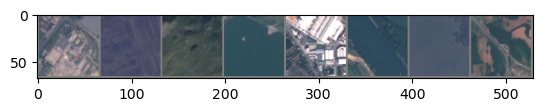

Predicted: HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation SeaLake Industrial River HerbaceousVegetation Highway


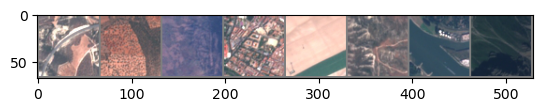

Predicted: HerbaceousVegetation HerbaceousVegetation Highway Residential AnnualCrop PermanentCrop Highway HerbaceousVegetation


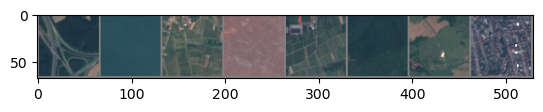

Predicted: Highway SeaLake PermanentCrop AnnualCrop PermanentCrop Forest Pasture Residential


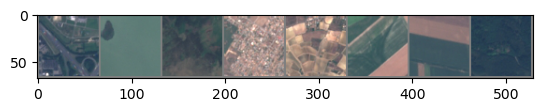

Predicted: River SeaLake HerbaceousVegetation Residential PermanentCrop AnnualCrop AnnualCrop Forest


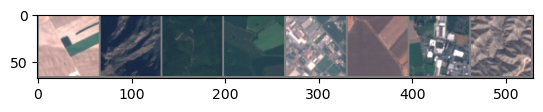

Predicted: AnnualCrop HerbaceousVegetation Forest River Industrial AnnualCrop Industrial HerbaceousVegetation


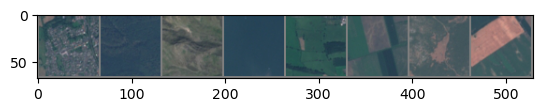

Predicted: Residential Forest HerbaceousVegetation SeaLake Pasture AnnualCrop HerbaceousVegetation AnnualCrop


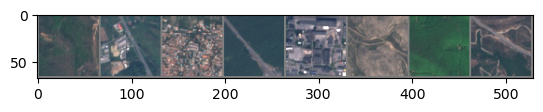

Predicted: HerbaceousVegetation River Residential Highway Industrial HerbaceousVegetation Forest HerbaceousVegetation


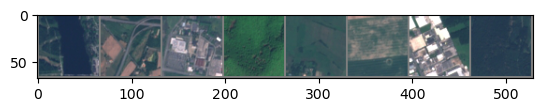

Predicted: River Highway Industrial Forest Pasture Pasture Industrial Forest


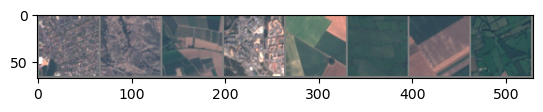

Predicted: Residential HerbaceousVegetation Highway Residential AnnualCrop Pasture AnnualCrop Pasture


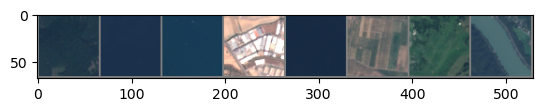

Predicted: Forest SeaLake SeaLake Industrial SeaLake PermanentCrop Pasture River


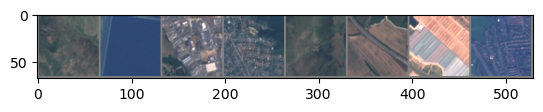

Predicted: HerbaceousVegetation SeaLake Industrial Residential HerbaceousVegetation PermanentCrop Highway Residential


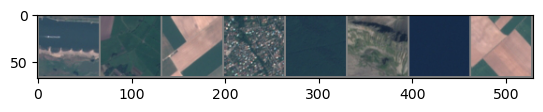

Predicted: River Pasture AnnualCrop Residential Forest HerbaceousVegetation SeaLake AnnualCrop


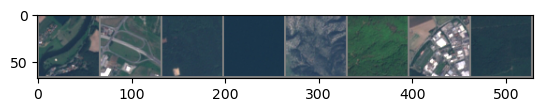

Predicted: Highway PermanentCrop Forest SeaLake Highway Forest Industrial Forest


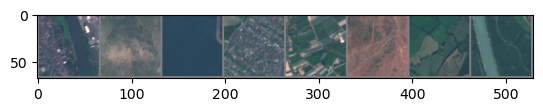

Predicted: Highway HerbaceousVegetation SeaLake Residential PermanentCrop HerbaceousVegetation Pasture River
Epoch 2, Loss: 0.3818717639033611


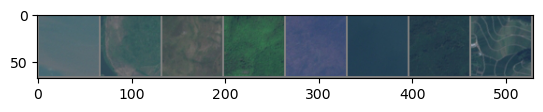

Predicted: SeaLake Pasture HerbaceousVegetation Forest HerbaceousVegetation SeaLake Forest River


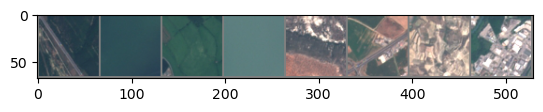

Predicted: Highway SeaLake Pasture SeaLake PermanentCrop Highway PermanentCrop Industrial


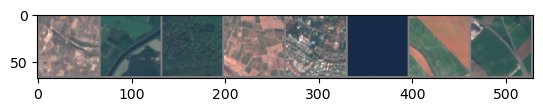

Predicted: HerbaceousVegetation Highway Forest PermanentCrop Residential SeaLake AnnualCrop AnnualCrop


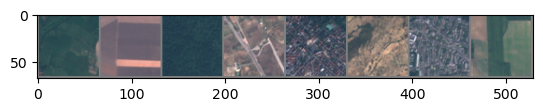

Predicted: Pasture AnnualCrop Forest HerbaceousVegetation Residential PermanentCrop Residential AnnualCrop


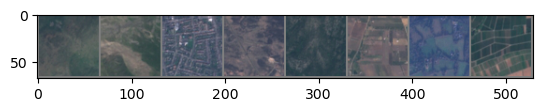

Predicted: HerbaceousVegetation HerbaceousVegetation Residential HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation Highway PermanentCrop


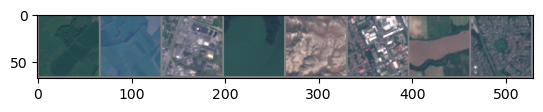

Predicted: Pasture Pasture Industrial SeaLake HerbaceousVegetation Industrial AnnualCrop Residential


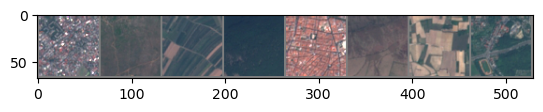

Predicted: Residential HerbaceousVegetation River Forest Residential HerbaceousVegetation PermanentCrop Highway


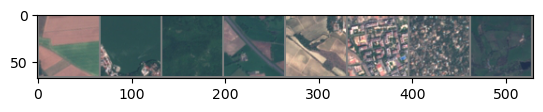

Predicted: AnnualCrop Pasture Forest Highway PermanentCrop Residential Residential Pasture


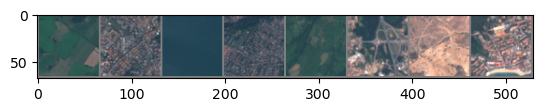

Predicted: Pasture Residential SeaLake Residential Pasture Highway PermanentCrop Residential


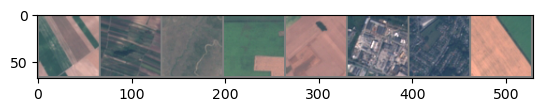

Predicted: AnnualCrop PermanentCrop HerbaceousVegetation AnnualCrop AnnualCrop Industrial Residential AnnualCrop


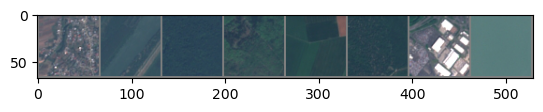

Predicted: Residential River Forest Pasture AnnualCrop Forest Industrial SeaLake


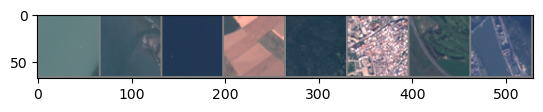

Predicted: SeaLake River SeaLake AnnualCrop Forest Residential Highway Highway


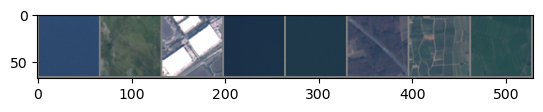

Predicted: SeaLake HerbaceousVegetation Industrial SeaLake SeaLake HerbaceousVegetation PermanentCrop Pasture


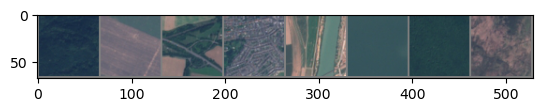

Predicted: Forest AnnualCrop River Residential River SeaLake Forest HerbaceousVegetation


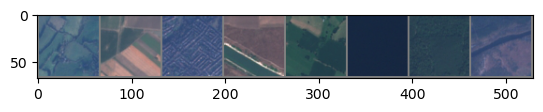

Predicted: Pasture AnnualCrop Residential AnnualCrop River SeaLake Forest HerbaceousVegetation


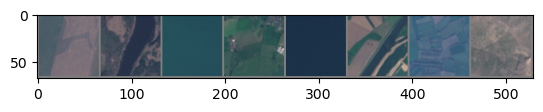

Predicted: AnnualCrop Highway SeaLake Pasture SeaLake River Pasture HerbaceousVegetation


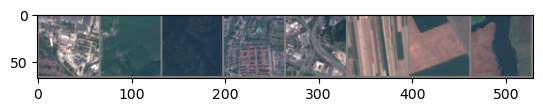

Predicted: Industrial Pasture Forest Residential Highway AnnualCrop AnnualCrop AnnualCrop
Epoch 3, Loss: 0.35308377524099405


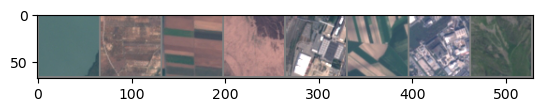

Predicted: SeaLake PermanentCrop AnnualCrop Highway Industrial AnnualCrop Industrial HerbaceousVegetation


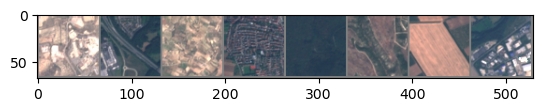

Predicted: Industrial Highway PermanentCrop Residential Forest PermanentCrop AnnualCrop Industrial


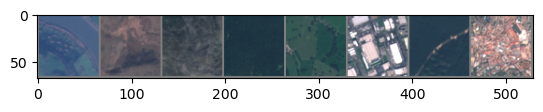

Predicted: River HerbaceousVegetation HerbaceousVegetation Forest Pasture Industrial Forest Residential


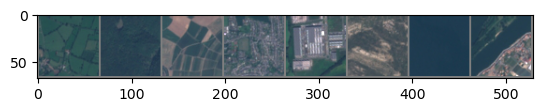

Predicted: Pasture Forest River Residential Industrial HerbaceousVegetation SeaLake Highway


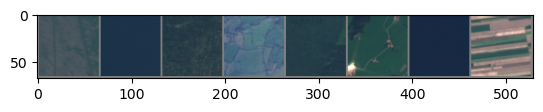

Predicted: HerbaceousVegetation SeaLake Forest Pasture Forest Pasture SeaLake PermanentCrop


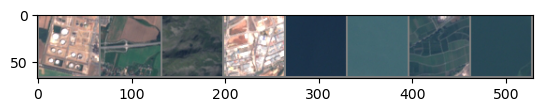

Predicted: Industrial Highway HerbaceousVegetation Industrial SeaLake SeaLake River SeaLake


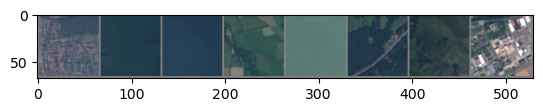

Predicted: Residential SeaLake SeaLake Pasture SeaLake Highway Forest Industrial


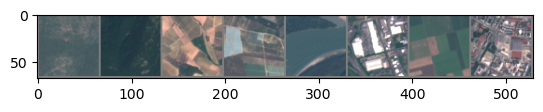

Predicted: HerbaceousVegetation Forest PermanentCrop PermanentCrop River Industrial AnnualCrop Residential


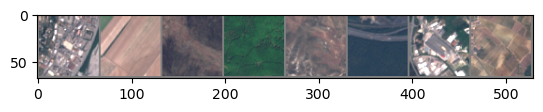

Predicted: Industrial AnnualCrop HerbaceousVegetation Forest PermanentCrop River Industrial PermanentCrop


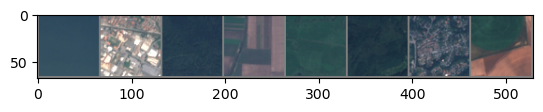

Predicted: SeaLake Industrial Forest AnnualCrop Pasture Forest Residential AnnualCrop


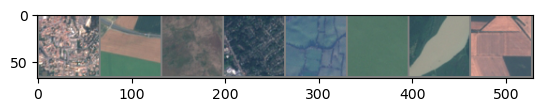

Predicted: Residential AnnualCrop HerbaceousVegetation HerbaceousVegetation Pasture SeaLake AnnualCrop AnnualCrop


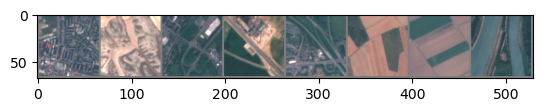

Predicted: Residential Highway Highway PermanentCrop Highway AnnualCrop AnnualCrop River


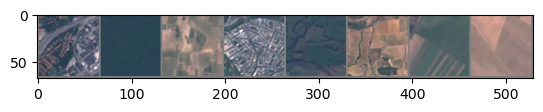

Predicted: Residential Forest PermanentCrop Residential River PermanentCrop AnnualCrop AnnualCrop


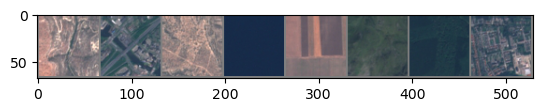

Predicted: Highway Highway HerbaceousVegetation SeaLake AnnualCrop HerbaceousVegetation Forest Residential


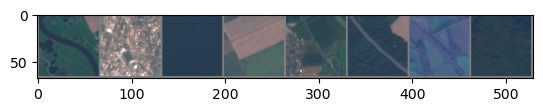

Predicted: River Residential SeaLake AnnualCrop Pasture Highway River Forest


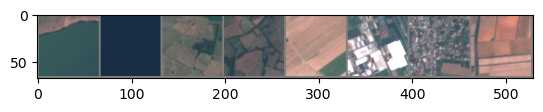

Predicted: SeaLake SeaLake HerbaceousVegetation HerbaceousVegetation AnnualCrop Industrial Residential PermanentCrop


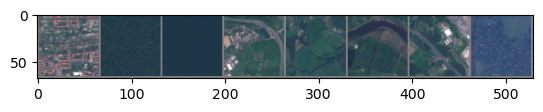

Predicted: Residential Forest SeaLake PermanentCrop Pasture River Highway River
Epoch 4, Loss: 0.32849049687209214


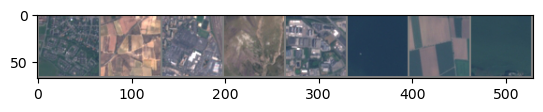

Predicted: Residential PermanentCrop Industrial HerbaceousVegetation Industrial SeaLake AnnualCrop SeaLake


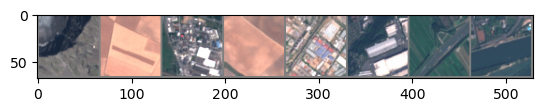

Predicted: HerbaceousVegetation AnnualCrop Industrial AnnualCrop Industrial Industrial Highway River


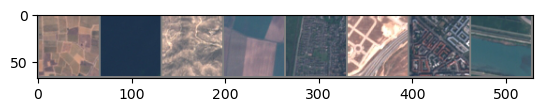

Predicted: PermanentCrop SeaLake HerbaceousVegetation AnnualCrop Residential Highway Residential River


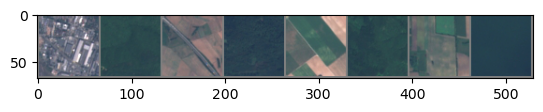

Predicted: Industrial Forest Highway Forest AnnualCrop Forest AnnualCrop Forest


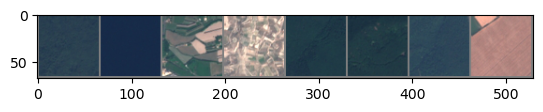

Predicted: Forest SeaLake PermanentCrop PermanentCrop Forest Forest Forest AnnualCrop


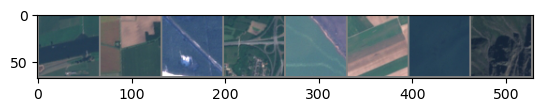

Predicted: River AnnualCrop River Highway SeaLake AnnualCrop SeaLake HerbaceousVegetation


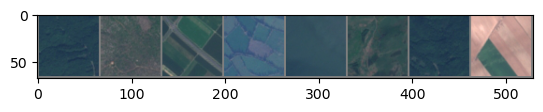

Predicted: Forest HerbaceousVegetation Highway Pasture SeaLake Pasture Forest AnnualCrop


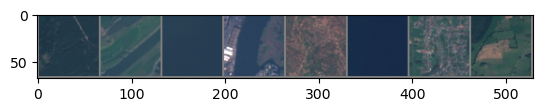

Predicted: Forest River SeaLake River HerbaceousVegetation SeaLake Residential Pasture


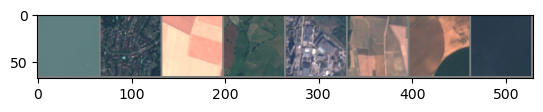

Predicted: SeaLake Residential AnnualCrop Pasture Industrial PermanentCrop AnnualCrop Forest


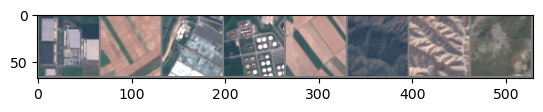

Predicted: Industrial AnnualCrop Industrial Industrial AnnualCrop River HerbaceousVegetation HerbaceousVegetation


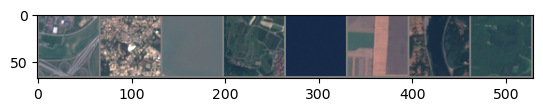

Predicted: Highway Residential SeaLake PermanentCrop SeaLake AnnualCrop River Forest


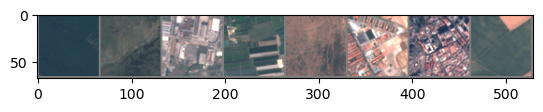

Predicted: Forest HerbaceousVegetation Industrial Highway PermanentCrop Industrial Residential AnnualCrop


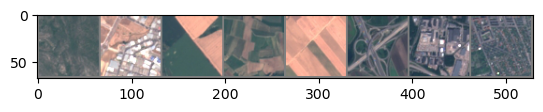

Predicted: HerbaceousVegetation Highway AnnualCrop PermanentCrop AnnualCrop Highway Industrial Residential


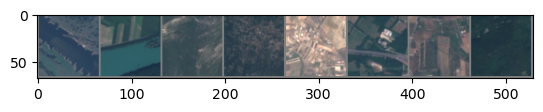

Predicted: River River HerbaceousVegetation HerbaceousVegetation PermanentCrop Highway PermanentCrop Forest


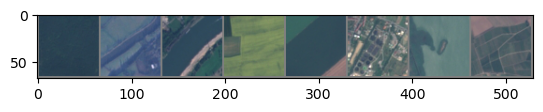

Predicted: Forest River River AnnualCrop AnnualCrop PermanentCrop AnnualCrop PermanentCrop


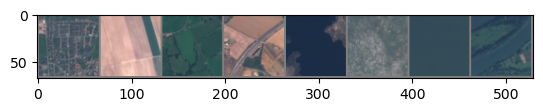

Predicted: Residential AnnualCrop Pasture Highway SeaLake HerbaceousVegetation SeaLake River


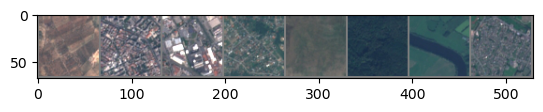

Predicted: PermanentCrop Residential Industrial Residential HerbaceousVegetation Forest River Residential
Epoch 5, Loss: 0.31257781774334653


StopIteration: 

In [58]:
# Number of training epochs
num_epochs = 25

testiter = iter(test_loader)
# Main training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 20 == 0:
            with torch.no_grad():
                # Show a sample of images from the test data and model's predictions
                test_images, test_labels = next(testiter)
                test_images, test_labels = test_images.to(device), test_labels.to(device)

                imshow(torchvision.utils.make_grid(test_images[:8].cpu()))
                test_outputs = net(test_images[:8])
                _, predicted = torch.max(test_outputs, 1)
                print('Predicted:', ' '.join('%s' % class_names[predicted[j]] for j in range(8)))

    # Print average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1)}")


print('Finished Training')

In [61]:
import numpy as np

# Initialize variables to track overall accuracy and per-class accuracy
correct = 0
total = 0
class_correct = list(0. for i in range(len(class_names)))
class_total = list(0. for i in range(len(class_names)))

# Set the model to evaluation mode
net.eval()

# Disable gradient computation for evaluation
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        # Overall accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Per-class accuracy
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# Calculate overall accuracy
overall_accuracy = 100 * correct / total
print(f'Overall Accuracy of the network on the test images: {overall_accuracy:.2f}%')

# Calculate and print accuracy for each class
for i in range(len(class_names)):
    if class_total[i] > 0:
        class_accuracy = 100 * class_correct[i] / class_total[i]
        print(f'Accuracy of {class_names[i]}: {class_accuracy:.2f}%')
    else:
        print(f'Accuracy of {class_names[i]}: N/A (no instances in test set)')

Overall Accuracy of the network on the test images: 84.37%
Accuracy of AnnualCrop: 89.70%
Accuracy of Forest: 93.91%
Accuracy of HerbaceousVegetation: 84.22%
Accuracy of Highway: 68.60%
Accuracy of Industrial: 90.60%
Accuracy of Pasture: 82.64%
Accuracy of PermanentCrop: 61.36%
Accuracy of Residential: 94.95%
Accuracy of River: 72.84%
Accuracy of SeaLake: 95.33%


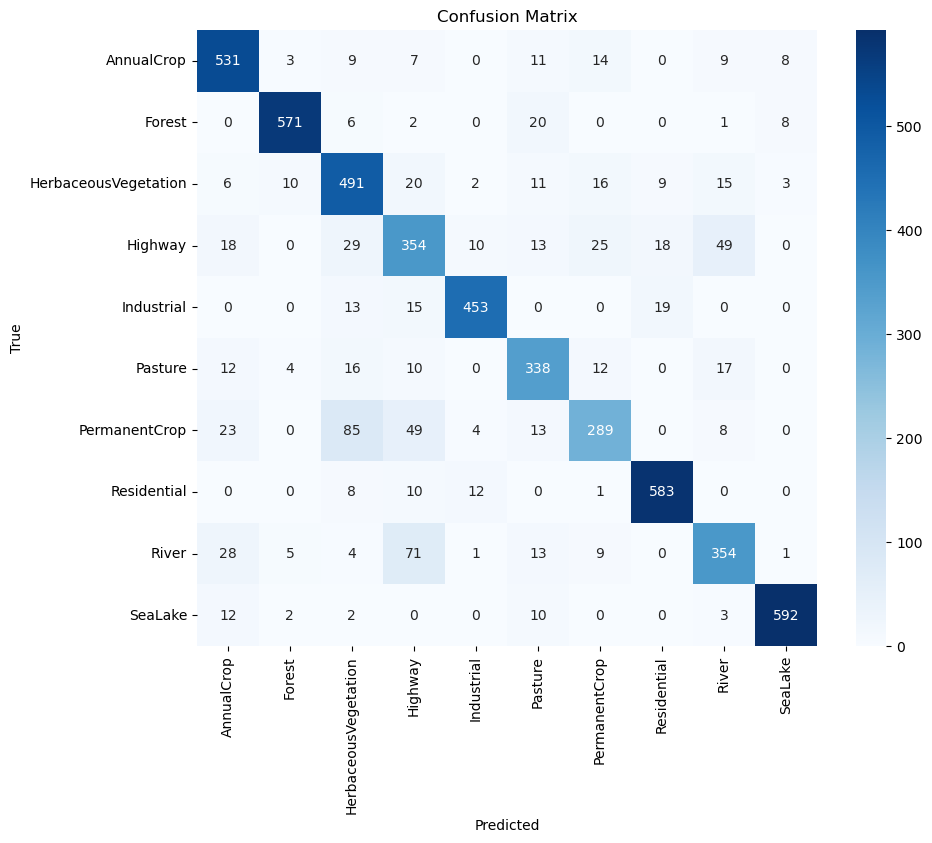

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to collect all true labels and predictions
all_labels = []
all_preds = []

# Set the model to evaluation mode
net.eval()

# Disable gradient computation for evaluation
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        # Collect all true labels and predictions
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()